### <font color='orange'> Sentiment Analysis of The West Wing TV Series</font>

The following is a sentiment analysis of televiewer reviews of the television series `The West Wing`. 

`The West Wing` is an American political drama television series created by Aaron Sorkin and initially broadcast on the 
NBC network. The series is set mostly in the West Wing of the White House, where the Oval Office and offices of 
presidential top personnel are housed, during the fictitious Democratic administration of President Josiah Bartlet. 
It aired on NBC from September 1999 until May 2006.

Time, TV Guide, Empire, Rolling Stone,and the New York Daily News have all rated `The West Wing` as one 
of the best television shows of all time. It was placed No. 10 on its list of "101 Best-Written TV Series".
Both critics and politicians alike have praised it. It has been the subject of critical study by scientific academics and 
former White House staffers. Two Peabody Awards, three Golden Globe Awards, and numerous more awards have been bestowed upon 
show. 

The reviews were extracted from [IMDb](https://www.imdb.com/title/tt0200276/reviews?ref_=tt_urv) using `BeautifulSoup`. The wordcloud
was then created to determine the most frequently occuring words in the reviews. The polarity and subjectivity were then measured for the data and finally the reviews were categorized as Negative, Neutral, or Positive.

### Extraction of Reviews

The reviews were extracted from the website using `BeautifulSoup`. 

In [ ]:
from urllib.request import urlopen  # for Python 3: from urllib.request import urlopen
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob

In [24]:
url = 'https://www.imdb.com/title/tt0200276/reviews?ref_=tt_urv'

In [27]:
soup = BeautifulSoup(urlopen(url))

In [144]:
soup.prettify()[0:1000]

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <script type="text/javascript">\n   var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <title>\n   The West Wing (TV Series 1999–2006) - The West Wing (TV Series 1999–2006) - User Reviews - IMDb\n  </title>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1

In [148]:
soup.text[0:500]

"\n\n\n\n\n\n\nThe West Wing (TV Series 1999–2006) - The West Wing (TV Series 1999–2006) - User Reviews - IMDb\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenuMoviesRelease CalendarDVD & Blu-ray ReleasesTop 250 MoviesMost Popular MoviesBrowse Movies by GenreTop Box OfficeShowtimes & TicketsIn TheatersComing SoonMovie NewsIndia Movie SpotlightTV ShowsWhat's on TV & StreamingTop 250 TV ShowsMost Popular TV ShowsBrowse TV Shows by GenreTV NewsIndia TV SpotlightWatchWhat to WatchLatest"

### Preprocessing of Text for Titles and Reviews

We will iterate through the soup object and extract the titles for each review and the text for the reviews.

In [138]:
my_titles = [x.get_text() for x in soup.find_all(attrs={'class':'title'})]
my_titles[0:3]

[" Aaron Sorkin's crowning jewel\n",
 ' A bit too slick and smug for its own good at times but generally a professional and enjoyable drama series for those on the left\n',
 ' The Best Wing\n']

In [140]:
my_reviews = [x.get_text() for x in soup.find_all(attrs={'class':'text show-more__control'})]      
my_reviews[0]

"Aaron Sorkin has created one of the best written shows of all times. It is powerful wishfulfilment TV of a moral president trying to navigate the political system. The dialog is written in Aaron's fast flowing musicality. However the show loses its center when Martin Sheen leaves and the story no longer compelling.It's a stroke of genius to have Martin Sheen as the president. And it reintroduce Rob Lowe as a major star now more than just a teen heartthrob. The great thing about the acting is that a lot of great lesser known actors Allison Janney, John Spencer, Bradley Whitford get to shine."

### Wordcloud

A wordcloud is created to determine the most frequest words found in the data. Stopwords were used to filter out certain words in the reviews.

The word `character`, `great`, and `good` are the most frequently occuring words in the reviews. This augurs well with the fact that the storyline evolves around key characters in the series. The name `Martin Sheen` also occurs frequently as the actor portrays President Bartlet in the story. 

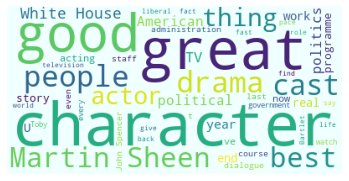

In [136]:
stopwords = set(STOPWORDS)

stopwords.update(['show','series','season','episode', 'West Wing', 'well',
                 'watching','see','make','time','episodes','seasons','made',
                 'will','come','look','West','writing','first','S','think',
                 'still','going','much','one','Wing','seem','never','many','seems','President','two','always',
                 'veu','way','enough','really','Sorkin','though','Aaron'])

wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color='azure').generate(str(my_reviews))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Polarity and Subjectivity

Using `TextBlob`, we will measure the polarity and subjectivity of each review. Polarity scores ranges from -1 to 1 where a score of 1 translates to a positive review while a -1 means a negative review. Subjectivity measures personal opinion or judgement and ranges from 0 to 1. A subjectivity score of 1 or near to 1 means that the review is subjective.

In [141]:
print('{:40}      :{:10}  :{:50}'.format('Review','Polarity', 'Subjectivity'))

for i in my_reviews:
    # Find sentiment of a review
    sentiment = TextBlob(i)
    # Print individual sentiment
    print('{:40}      : {: 01.2f}      : {:01.2f}'.format(i[:40], sentiment.polarity, sentiment.subjectivity))

Review                                        :Polarity    :Subjectivity                                      
Aaron Sorkin has created one of the best      :  0.23      : 0.39
A series that follows the daily lives of      :  0.19      : 0.48
It was hard to find a summary line and i      :  0.23      : 0.56
The first two (maybe three) seasons of t      :  0.10      : 0.44
The West Wing is a TV series created by       :  0.08      : 0.32
I finally got to see two episodes of thi      :  0.20      : 0.43
The first edition, indeed season, of thi      :  0.15      : 0.42
Irritatingly preachy, folksy and smug, b      :  0.10      : 0.44
The West Wing is Hollywood's version of       :  0.28      : 0.43
One of the things I really like about "T      :  0.38      : 0.45
"The West Wing" is quite possibly the be      :  0.13      : 0.42
I've just started watching this heavily       :  0.08      : 0.47
I have nothing but praise for the West W      :  0.22      : 0.52
Most of the time, Hollywood dep

All polarity scores are positive, but they fall below 0.50. The highest polarity score is 0.40. Checking the actual review, we can see positive comments about the production design, costume, and plot.

In [150]:
my_reviews[14]

'"THE WEST WING," in my opinion, is a pure definition of must-see TV! Despite the fact that I\'ve never seen every episode, I still enjoyed it. It\'s hard to say which episode is my favorite. However, I get a kind of funny feeling in my stomach whenever a world crisis occurs. As a matter of fact, I think just about every single episode I\'ve seen is touching. Everyone always gave a good performance, the production design was spectacular, the costumes are well-designed, and the writing was always very strong. In conclusion, even though it can be seen in syndication now, I strongly recommend you catch it just in case it goes off the air for good.'

The lowest review got a polarity score of 0.08 and mostly narrates about the series' plot. It ended the review with a positive comment on the uniqueness of the storyline. This review also got the highest subjectivity score of 0.7.

In [151]:
my_reviews[4]

"The West Wing is a TV series created by Aaron Sorkin that was originally broadcast on NBC from 1999 to 2006. The story was set in the West Wing of the White House — where the Oval Office and offices of presidential senior staff are located — during the fictional Democratic administration of Josiah Bartlet,played by Martin Sheen.It employed a broad ensemble cast to portray the many positions involved in the daily work of the federal government: The President, the First Lady, and the President's senior staff and advisers form the core cast and numerous secondary characters, appearing intermittently complement story lines that generally revolve around this core group that included Rob Lowe,Alan Alda,Stockard Channing,Moira Kelly,Kristin Chenoweth,Dulé Hill,Allison Janney,Joshua Malina,Mary McCormack,Janel Moloney,Richard Schiff,John Spencer,Bradley Whitford and Jimmy Smits.The series had ventured where no other had gone before such as: an extraordinarily intimate look at an American Pres

### Categorizing Reviews

The reviews are categorized below based on their polarity scores where categories are classified as Negative, Neutral, and Positive.

Final summarized counts:  [12, 13, 0]
Pie Representation: 


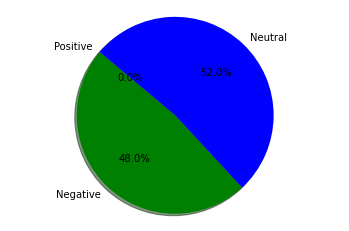

In [143]:
# Categorize Polarity into Positive, Neutral, or Negative
labels = ['Negative', 'Neutral', 'Positive']

# Initialize count array
values = [0,0,0]

# Categorize each review
for i in my_reviews:
    sentiment = TextBlob(i)
    
    # Custom formula to convert polarity
    # 0 = Negative; 1 = Neutral; 2 = Positive
    polarity = round((sentiment.polarity + 1) * 3) % 3
    
    # Add the summary array
    values[polarity] = values[polarity] + 1

print('Final summarized counts: ', values)

# Set colors by label
colors = ['Green','Blue','Red']

print('Pie Representation: ')

# Plot
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Neutral reviews is slightly above positive reviews with 52%. No negative reviews were classified based on the sample data.